# Stoneburner, Kurt
- ## DSC 550 - Week 05

Between a misunderstanding of the scopr of this week's work and me being home with my children for Spring break, I went tad Don Quixote with this assignment.

First off: The Provided code runs well. Which completes the requirements for this week.

My personal goals for this week were two-fold, continue developing my  NLTK toolkit by building functions that standardize the most common NLTK processes. Most of these processes can be accomplished with a few lines of code, and creating these functions is a bit of overkill. The idea is standardize the pipeline/workflow for NLTK tasks. Whether or not this turns out to be an effective concept, remains to be seen. But it is a concept that I designed and implemented at my job, so I'm pretty biased towards making Toolkits work. 

**Function of Note:** apply_with_progress() is designed to display progress of an apply() function. Some functions can take many minutes to run and it's a bit disconcerting to stare at an hourglass. apply_with_progress() accepts a series, a function, and a slice number (default is 20). The input series is sliced into chunks (based on the slices value), the series.apply(function) is run on each slice then prints a progress report with an estimate of time remaining. This is a 'nice-to-have' convenience function. In the spirit of collaboration, I shared this code in a Teams thread.

After running the supplied code, I reprocessed articles.csv using my functions. It's a alot of effort to recreate what you did with a few bespoke lines of code, I'm hoping this code will simply plug into future projects.

I then attempted to answer the hypothesis: Articles about Climate Change are more likely to be published by "Liberal" sources? Mostly to see if I could work through the steps.

Pre-Processing Steps
- Cleaning
- Tokenization
- Remove Stop words.

Cluster text using k-means on tf-idf
- Lemmatize Text
- Stem Text (not sure if useful, but feature reduction is important for clustering)
- perform tf-idf
- estimate optimal cluster size of 55 using MiniBatchKMeans
- Build the k-means clusters
- assign the clusters to the dataframe

Analyze clusters
- retokenize the text without stemming and lemmatization
- run tfidf again on non-stemmed words
- extract top 5 keywords by frequency from tfidf
- determine cluster 46 is most likely associated with climate change. 
- Plot the words frequencies of 'climate' and 'change', 'climate', and 'change', to estimate cluster accuracy.
- Plot article frequencies of Cluster 46.

I enjoyed this project. I'm certain my conclusion is spurrious. K-Means in this context was likely not a good classification model or perhaps I need to keep working with the cluster sizes. I feel like it was good practice processing the data.

In [42]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import string
import re
import time

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [43]:
#//**********************************************
#//*** Backup/Recall our work to/from a file.
#//********************************************************************************************
#//*** Data set takes about 40 minutes to build from scratch. This saves on per session time
#//********************************************************************************************
#df.to_pickle("z_wk05_assignment.zip")
#//*** Read back from a file
#df = pd.read_pickle("z_wk05_assignment.zip")

In [44]:
#//***************************************
#//*** Apply Common Cleanup operations
#//***************************************
#//*** These cleanup functions are based on Week 02 cleanup code, and rebuilt for Week 04

#//*****************************************
#//*** Functions:
#//*****************************************
#//*** Mr_clean_text: Converts to lowercase, removes punctuation, newlines and html markup
#//****************************************************************************************************
#//*** Tokenize_series: Converts a Series containing strings, to a series containing tokenized lists
#//****************************************************************************************************
#//*** Remove_stop_words: Removes Stop words based on nltk stopwords 'english' dictionary
#//****************************************************************************************************
#//*** Apply_stemmer: Stem tokenized words using nltk.stem.porter.PorterStemme
#//****************************************************************************************************
#//*** apply_pos_tag: Builds Part of Speech Tagging from tokeninzed text
#//****************************************************************************************************

#//****************************************************************************************************

#//****************************************************************************************************
#//*** Key values will default to true. If code needs to be defaulted to False, a default_false list can be added later
#//*** All Boolean kwarg keya are stored in kwarg list. This speeds up the coding of the action_dict.
#//*** As Kwargs are added 
def mr_clean_text(input_series, input_options={}):
    
    def clean_text(input_string):
        clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", input_string.lower())
        return re.sub(r'\W+', ' ', clean1)

    #//*** import time library
    try:
        type(time)
    except:
        import time
    
    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
    
    #//*** Start Timing the process
    start_time = time.time()

    
    #//*** Add some data validation. I'm preparing this function for additional use. I'm checking if future users (ie future me)
    #//*** may throw some garbage at this function. Experience has taught me to fail safely wherever possible.

    #//*** All kwargs are listed here. These initialize TRUE by default.
    key_list = [ "lower", "newline", "html", "punctuation" ]
    
    default_false = ["remove_empty"]
    
    #//*** Build Action Dictionary
    action_dict = { } 
    
    #//*** Build the keys from kwarg_list and default them to TRUE
    for key in key_list:
        action_dict[key] = True
    
    for key in default_false:
        action_dict[key] = False
        
    #//*** Loop through the input kwargs (if any). Assign the action_dict values based on the kwargs:
    for key,value in input_options.items():
        print(key,value)
        action_dict[key] = value
    
    
    #//*************************************************************************
    #//*** The Cleanup/Processing code is a straight lift from DSC550 - Week02
    #//*************************************************************************
    #//*** Convert to Lower Case, Default to True
    if action_dict["lower"]:
        input_series = input_series.str.lower()
    
   
    #//*** Remove New Lines
    if action_dict["newline"]:
        #//*** Rmove \r\n
        input_series = input_series.str.replace('\r?\n',"")

        #//*** Remove \n new lines
        input_series = input_series.str.replace('\n',"")

    #//*** Remove html entities, observed entities are &gt; and &lt;. All HTML entities begin with & and end with ;.
    #//*** Let's use regex to remove html entities
    if action_dict["html"]:
        input_series = input_series.str.replace(r'&.*;',"")

    #//*** Remove the empty lines
    if action_dict["remove_empty"]:
        input_series = input_series[ input_series.str.len() > 0]

    #//*** Remove punctuation
    if action_dict["punctuation"]:
        #//*** Load libraries for punctuation if not already loaded.
        #//*** Wrapping these in a try, no sense in importing libraries that already exist.
        #//*** Unsure of the cost of reimporting libraries (if any). But testing if library is already loaded feels
        #//*** like a good practice

        #input_series = input_series.apply(lambda x: clean_text(x))

        try:
            type(sys)
        except:
            import sys

        try:
            type(unicodedata)
        except:
            import unicodedata

        #//*** replace Comma and Period with a space.
        for punct in [",","."]:
            input_series = input_series.str.replace(punct," ")

        #//*** Remove punctuation using the example from the book
        punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P') )
        input_series = input_series.str.translate(punctuation)

        #table = str.maketrans(dict.fromkeys(string.punctuation))  # OR {key: None for key in string.punctuation}
        #print(table )
        #input_series = input_series.str.translate(table)

    print(f"Text Cleaning Time: {time.time() - start_time}")

    return input_series

                                          
#//*** Tokenize a Series containing Strings.
#//*** Breaking this out into it's own function for later reuse.
#//*** Not a lot of code here, but it helps to keep the libraries localized. This creates standarization for future
#//*** Stoneburner projects. Also has the ability to add functionality as needed.

def tokenize_series(input_series,slices=20,input_options={}):
    
    try:
        type(nltk)
    except:
        import nltk
    
    word_tokenize = nltk.tokenize.word_tokenize 
    
    #//*** import time library
    try:
        type(time)
    except:
        import time
        
    #//*** All kwargs are listed here. These initialize False by default.
    key_list = [ "fast", "quiet" ]
    
    #//*** Build Action Dictionary
    action_dict = { } 
    
    #//*** Build the keys from kwarg_list and default them to False
    for key in key_list:
        action_dict[key] = False
        
    #//*** Loop through the input kwargs (if any). Assign the action_dict values based on the kwargs:
    for key,value in input_options.items():
        print(key,value)
        action_dict[key] = value
    
    #//*** Start Timing the process
    start_time = time.time()
    
    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
            
    #input_series = input_series.apply(word_tokenize)
    
    if action_dict['fast'] == False:
        print("Processing Tokens with NLTK Word Tokenize")
        input_series = apply_with_progress(input_series,word_tokenize,slices)
    else:
        print("Process Tokens with Split()")
        input_series = apply_with_progress(input_series,lambda x: x.split(),slices)
    
    
    
    print(f"Tokenize Time: {time.time() - start_time}")
    
    return input_series

#//*** Remove Stop words from the input list
def remove_stop_words(input_series):
    
    #//*** This function removes stop_words from a series.
    #//*** Works with series.apply()
    def apply_stop_words(input_list):

        #//*** Load Stopwords   
        for word in input_list:
            if word in stop_words:
                input_list.remove(word)
                #print(f"Removing: {word}")
        return input_list

    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk
        
    stopwords = nltk.corpus.stopwords

    #//*** Stopwords requires an additional download
    try:
        type(stopwords)
    except:
        nltk.download('stopwords')


    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()

    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
    
    #//*** The stop_words include punctuation. Stop Word Contractions will not be filtered out.
    #//*** Manually adding word the
    stop_words = []
    
    #//*** Remove apostrophies from the stop_words
    for stop in stopwords.words('english'):
        stop_words.append(stop.replace("'",""))

    #print("Stop Words: ")
    print(stop_words)
    print ("Processing Stop Words")
    input_series = apply_with_progress(input_series, apply_stop_words)
    
    print(f"Stop Words Time: {time.time() - start_time}")
    
    return input_series

def apply_stemmer(input_series,trim_single_words = True,slices=100):
    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk

    #//*** Instantiate the Stemmer
    porter = nltk.stem.porter.PorterStemmer()
    
    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()
    
    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
    
    #//*** 1.) Apply() an action to each row
    #//*** 2.) lambda word_list, each row is treated as word_list for the subsequent expression
    #//*** 3.) The base [ word for word in wordlist] would return each word in word_list as a list. 
    #//*** 4.) [porter.stem(word) for word in word_list] - performs stemming on each word and returns a list
    #input_series = input_series.apply(lambda word_list: [porter.stem(word) for word in word_list] )
    print("Begin: Apply Stemmer")
    input_series = apply_with_progress(input_series, lambda word_list: [porter.stem(word) for word in word_list],slices)
    
    #//*** Remove Single letter words after stemming
    
    """
    if trim_single_words:
        for word_list in input_series:
            for word in word_list:
                if len(word) < 2:
                    word_list.remove(word)
    """
    
    print(f"Apply Stemmer Time: {time.time() - start_time}")
    return input_series

def apply_pos_tag(input_series,slices=100):
    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk

    from nltk import pos_tag

    #//pos_tag requires an additional download
    try:
        pos_tag(["the","quick","brown","fox"])
    except: 
        nltk.download('averaged_perceptron_tagger')
    
    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()
    
    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
    
    print("Begin Part of Speech tagging")
    
    input_series = apply_with_progress(input_series,pos_tag,slices)
    
    print(f"Part of Speech Tagging Time: {round(time.time() - start_time,2)}s")
    
    return input_series
    
def apply_lemmatization(input_series,slices=20):
            
    #//*** import nltk if needed
    try:
        type(nltk)
    except:
        import nltk


    from nltk.stem import WordNetLemmatizer
    
    from nltk.corpus import wordnet    
    
    #nltk.download('wordnet')
    
    
    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Start Timing the process
    start_time = time.time()
    
    #//*** Force creation of a new Series instead of using a copy
    input_series = input_series.copy()
    
    # Initialize the Lemmatizer instance
    lemmatizer = WordNetLemmatizer() 
    
    #//*** 1.) Apply() an action to each row
    #//*** 2.) lambda word_list, each row is treated as word_list for the subsequent expression
    #//*** 3.) The base [ word for word in wordlist] would return each word in word_list as a list. 
    #//*** 4.) [lemmatizer.lemmatize(word) for word in word_list] - performs lemmtization on each word and returns a list
    #lemmatized = input_series.apply(lambda word_list: [lemmatizer.lemmatize(*word) for word in word_list] )
    
    print("Begin Lemmatization...")
    
    input_series = apply_with_progress(input_series,lambda word_list: [lemmatizer.lemmatize(word) for word in word_list],20)
    
    print(f"Lemmatization Time: {time.time() - start_time}")
    
    #if detoken:
    #    return tokenize_series(input_series,5,{"fast":True})

    return input_series

#//*** Apply a function to a Series and display processing progress
#//*** Slices is the total number of intervals to report progress.
#//*** Slices = 20 displays processing after every 5% is processed
#//*** Slices = 100 displays processing after every 1% is processed
def apply_with_progress(input_series,input_function,slices=20):
    #//*** import time library
    try:
        type(time)
    except:
        import time

    #//*** Get the time at the start of the loop, used for elapsed time.
    start_time = time.time()
    
    #//*** The interval is the number of elements to process in each Loop. The default is 20.
    #//*** Which displays results at 5% intervals.
    interval = int(len(input_series)/slices)
    
    #//*** Total number of items to process
    total = len(input_series)
    

    #//*** Loop through slice times and display processing statistics for each slice.
    for x in range(0, slices ):
        #//*** Get time at the start of the slice.
        loop_time = time.time()
        
        #//*** Set the start index
        begin_dex = interval*x
        
        #//*** Set the end index
        end_dex = interval*x+interval-1
        
        #//*** Apply the input function to a slice of the input_series
        #//*** This part does all the actual 'work'
        input_series[begin_dex:end_dex] = input_series[begin_dex:end_dex].apply(input_function)
        
        #//*** Get the time after the slice of work is done
        now = time.time()
        
        #//*** Compute the estimated remaining time
        #//*** Total elapsed time / % of completed slices = Estimated total time
        #//*** Estimated total time - elaped time = Remaining time
        est_remain = round( ( ( now - start_time ) /  ( (x+1)/slices ) - (now-start_time)),2)

        #//*** Display Results so we know how much time is left (so we can effectively multi-task: ie comments, research and Valheim)
        print(f"Processed {x}/{slices}: {begin_dex}:{end_dex} [{total}] in {round(now-loop_time,2)}s elapsed: {round(now-start_time,2)}s est Remain: {est_remain}s")
    
    #//*** END For Slice Loop
    
    #//*** Process the remaining values (Since interval is an int there should be a remainder)
    loop_time = time.time()
    begin_dex = end_dex+1
    if begin_dex < len(input_series):
        print(f"Processing Remaining values: {begin_dex} : {total} ")
        #print(input_series[begin_dex:])
        input_series[begin_dex:] = input_series[begin_dex:].apply(input_function)
    
    #//*** Display Final output
    print(f"Processed {slices}/{slices}: {begin_dex}:{end_dex} [{total}] in {round(time.time()-loop_time,2)}s elapsed: {round(time.time()-start_time,2)}s")
    
    #//*** return Series
    return input_series

In [45]:
#Case Study:  Testing  Hypothesis

#Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

#NOTE: This case study is not complete!  We are only using the first part of it to practice Graphic Analytics.

#Step 1:  Load data into a dataframe
addr1 = "z_wk05_articles1.csv"

#//*** Added index_col = 0. This sets the first cokumn as the index, and avoids generating the index as the first column.
articles = pd.read_csv(addr1, index_col=0)

In [46]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 2:  check the dimension of the table/look at the data
print("The dimension of the table is: ", articles.shape)

#Display the data
print(articles.head(5))

#what type of variables are in the table 
print("Describe Data")
print(articles.describe())
print("Summarized Data")
print(articles.describe(include=['O']))

#display length of data
print(len(articles))

#display publishers (publications)
print(articles.publication.unique())

#display min, max of years published
print(articles['year'].min())
print(articles['year'].max()) 

#display how many articles from each year
print(articles['year'].value_counts())


The dimension of the table is:  (50000, 9)
      id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                             content  
0  WASHINGTON  —  

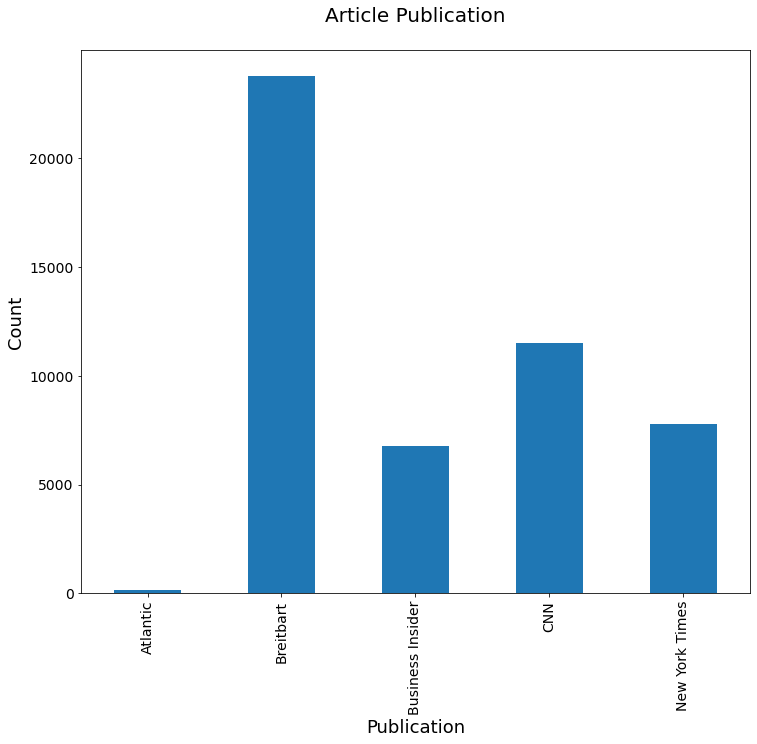

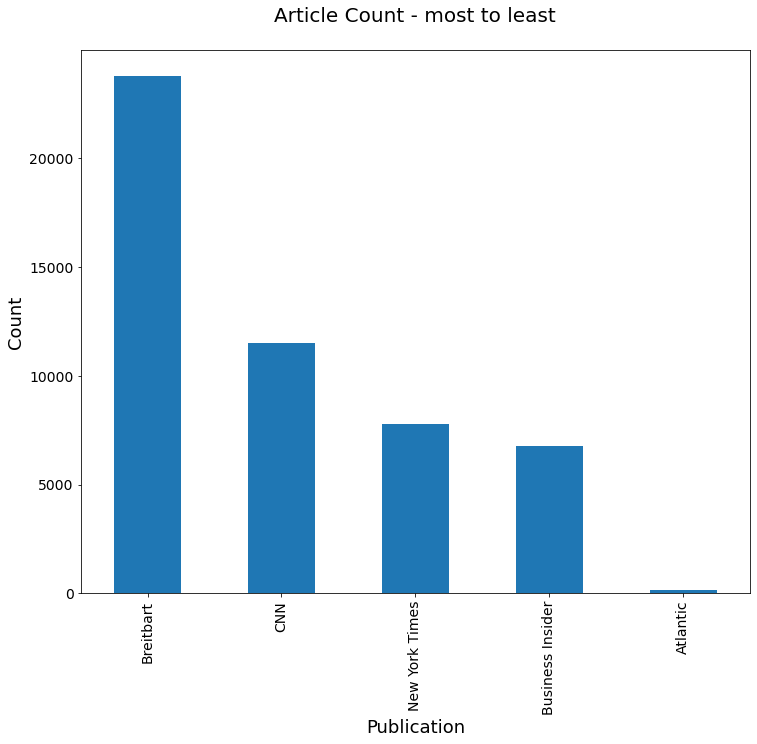

In [47]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 3:  Create some bar charts to show articles
#display bar chart of articles sorted by Publication Name
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

#display bar chart of articles sorted by counts
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()


In [48]:
#//************************************
#//**** INCLUDED CODE SECTION
#//************************************
#Step 4: Cleaning
#//*** Keeping this code for reference and comparison to my cleaning functions.
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].apply(lambda x: clean_text(x))

print("clean text:  ",articles['tokenized'].head())

#look at mean, min, max article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:  ",articles['num_wds'].mean())
print("Min:  ",articles['num_wds'].min())
print("Max:  ",articles['num_wds'].max())




clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object
Mean:   636.26046
Min:   0
Max:   24736


In [49]:
#Step 5:  remove articles with no words
len(articles[articles['num_wds']==0])
articles = articles[articles['num_wds']>0]
print("new mean:  ",articles['num_wds'].mean())
print("new min:  ",articles['num_wds'].min())



new mean:   637.0886752778612
new min:   1


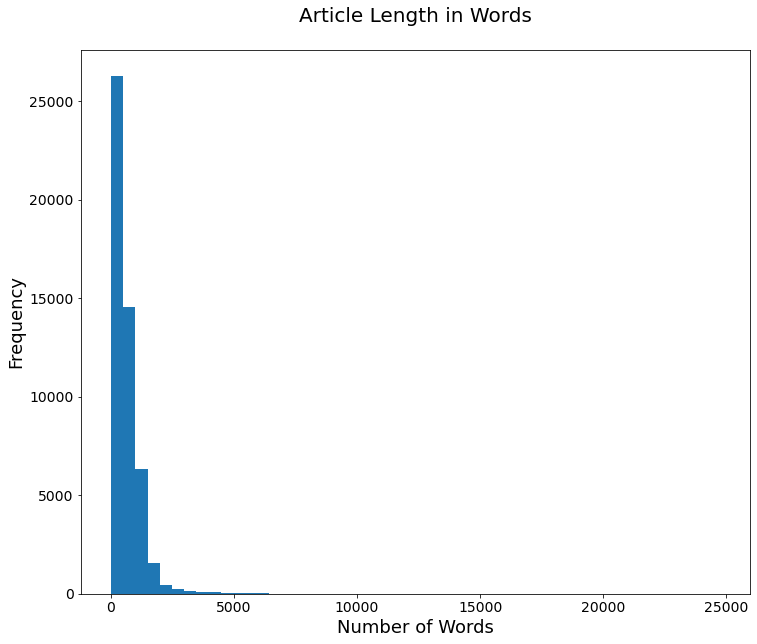

In [50]:
#Step 6:  Check for Outliers:  show bar graph of outliers
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()

In [51]:
#//*** Here are my steps for cleaning and pre-processing

#//*** My version of Step 4, using the tollkit of functions i've been working on since Week02
#//*** Processed column will contained the cleaned text as a string.
#//*** Applying cleaning functions individually for clarity

addr1 = "z_wk05_articles1.csv"

df = pd.read_csv(addr1, index_col=0)
df['processed'] = mr_clean_text(df['content'],{"lower": True, "newline": True, "html": True, "remove_empty" : False, "punctuation" : True})

#//Remove Items with an Arbitrary length of 0

print(f"Articles of length with 0 characters: {len(df[ df['processed'].str.len() == 0 ])}")
print("Remove these articles")
print(f"Article Count Before: {len(df)}")
df = df[ df['processed'].str.len() > 0 ]
print(f"Article Count After: {len(df)}")

lower True
newline True
html True
remove_empty False
punctuation True
Text Cleaning Time: 14.557543516159058
Articles of length with 0 characters: 25
Remove these articles
Article Count Before: 50000
Article Count After: 49975


In [52]:
#//************************
#//*** Tokenize the Text
#//************************
#//*** The custom function displays progress while it's working
df['tokens'] = tokenize_series(df['processed'],20,{"fast":True})

fast True
Process Tokens with Split()
Processed 0/20: 0:2497 [49975] in 0.37s elapsed: 0.37s est Remain: 6.95s
Processed 1/20: 2498:4995 [49975] in 0.18s elapsed: 0.55s est Remain: 4.94s
Processed 2/20: 4996:7493 [49975] in 0.16s elapsed: 0.71s est Remain: 4.03s
Processed 3/20: 7494:9991 [49975] in 0.17s elapsed: 0.88s est Remain: 3.53s
Processed 4/20: 9992:12489 [49975] in 0.06s elapsed: 0.94s est Remain: 2.82s
Processed 5/20: 12490:14987 [49975] in 0.07s elapsed: 1.01s est Remain: 2.37s
Processed 6/20: 14988:17485 [49975] in 0.11s elapsed: 1.12s est Remain: 2.09s
Processed 7/20: 17486:19983 [49975] in 0.07s elapsed: 1.2s est Remain: 1.8s
Processed 8/20: 19984:22481 [49975] in 0.07s elapsed: 1.27s est Remain: 1.55s
Processed 9/20: 22482:24979 [49975] in 0.08s elapsed: 1.35s est Remain: 1.35s
Processed 10/20: 24980:27477 [49975] in 0.12s elapsed: 1.47s est Remain: 1.2s
Processed 11/20: 27478:29975 [49975] in 0.07s elapsed: 1.54s est Remain: 1.02s
Processed 12/20: 29976:32473 [49975] in

In [53]:

df['num_wds'] = df['tokens'].apply(lambda x: len(x))

print(articles['num_wds'].sum())
print(df['num_wds'].sum())

31813023
31854627


In [54]:
#//************************
#//*** Remove Stop Words
#//************************
#//*** The custom function displays progress while it's working
df['tokens'] = remove_stop_words(df['tokens'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [55]:
#//*** Compare Corpus Word Count from example
df['num_wds'] = df['tokens'].apply(lambda x: len(x))

print(articles['num_wds'].sum())
print(df['num_wds'].sum())

31813023
21935376


In [56]:
#//********************************
#//*** Lemmatize the corpus
#//********************************

#//*** Convert tokens back to string for lematization
#df['lema_stem_tokens'] = df['tokens'].apply(lambda word_list: " ".join(word_list))
nltk.download('wordnet')
df['lema_stem_tokens'] = apply_lemmatization(df['tokens'])  

Begin Lemmatization...


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stonk013\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed 0/20: 0:2497 [49975] in 6.48s elapsed: 6.48s est Remain: 123.18s
Processed 1/20: 2498:4995 [49975] in 6.3s elapsed: 12.79s est Remain: 115.09s
Processed 2/20: 4996:7493 [49975] in 6.1s elapsed: 18.89s est Remain: 107.04s
Processed 3/20: 7494:9991 [49975] in 2.94s elapsed: 21.83s est Remain: 87.33s
Processed 4/20: 9992:12489 [49975] in 2.48s elapsed: 24.31s est Remain: 72.94s
Processed 5/20: 12490:14987 [49975] in 2.55s elapsed: 26.86s est Remain: 62.68s
Processed 6/20: 14988:17485 [49975] in 2.73s elapsed: 29.59s est Remain: 54.96s
Processed 7/20: 17486:19983 [49975] in 2.62s elapsed: 32.22s est Remain: 48.32s
Processed 8/20: 19984:22481 [49975] in 2.52s elapsed: 34.74s est Remain: 42.46s
Processed 9/20: 22482:24979 [49975] in 2.51s elapsed: 37.25s est Remain: 37.25s
Processed 10/20: 24980:27477 [49975] in 2.62s elapsed: 39.87s est Remain: 32.62s
Processed 11/20: 27478:29975 [49975] in 2.57s elapsed: 42.44s est Remain: 28.29s
Processed 12/20: 29976:32473 [49975] in 3.02s elap

In [57]:
print(df['lema_stem_tokens'])

0        [washington, congressional, republican, new, f...
1        [bullet, shell, get, counted, blood, dry, voti...
2        [walt, disney, bambi, opened, 1942, critic, pr...
3        [death, may, great, equalizer, necessarily, ev...
4        [seoul, south, korea, north, korea, leader, ki...
                               ...                        
53287    [chairman, ceo, exxonmobil, rex, tillerson, ad...
53288    [ive, spent, nearly, 20, year, looking, intell...
53289    [donald, trump, taking, necessary, step, resol...
53290    [dozen, college, could, forced, close, next, s...
53291    [force, gravity, described, using, number, met...
Name: lema_stem_tokens, Length: 49975, dtype: object


In [58]:
#//************************
#//*** Stem the lemma's
#//***********************************************************************
#//*** We are trying to reduce the feature set for tfidf and clustering
#//***********************************************************************
df['lema_stem_tokens'] = apply_stemmer(df['lema_stem_tokens'])

Begin: Apply Stemmer
Processed 0/100: 0:498 [49975] in 5.95s elapsed: 5.95s est Remain: 588.88s
Processed 1/100: 499:997 [49975] in 5.91s elapsed: 11.85s est Remain: 580.81s
Processed 2/100: 998:1496 [49975] in 5.82s elapsed: 17.67s est Remain: 571.43s
Processed 3/100: 1497:1995 [49975] in 5.65s elapsed: 23.33s est Remain: 559.83s
Processed 4/100: 1996:2494 [49975] in 5.57s elapsed: 28.89s est Remain: 548.95s
Processed 5/100: 2495:2993 [49975] in 6.99s elapsed: 35.88s est Remain: 562.09s
Processed 6/100: 2994:3492 [49975] in 6.4s elapsed: 42.28s est Remain: 561.74s
Processed 7/100: 3493:3991 [49975] in 5.84s elapsed: 48.12s est Remain: 553.41s
Processed 8/100: 3992:4490 [49975] in 5.76s elapsed: 53.88s est Remain: 544.78s
Processed 9/100: 4491:4989 [49975] in 6.03s elapsed: 59.91s est Remain: 539.21s
Processed 10/100: 4990:5488 [49975] in 5.97s elapsed: 65.89s est Remain: 533.09s
Processed 11/100: 5489:5987 [49975] in 5.81s elapsed: 71.7s est Remain: 525.81s
Processed 12/100: 5988:6486

Processed 99/100: 49401:49899 [49975] in 3.1s elapsed: 332.1s est Remain: 0.0s
Processing Remaining values: 49900 : 49975 
Processed 100/100: 49900:49899 [49975] in 1.05s elapsed: 333.16s
Apply Stemmer Time: 333.15917205810547


In [59]:
#//*** Eliminate words with length of 0,1 or 2. This is an arbitrary value to help with feature reduction
df['tokens'] = df['tokens'].apply(lambda word_list : list(filter(lambda word : len(word) >= 3, word_list))) 
df['lema_stem_tokens'] = df['lema_stem_tokens'].apply(lambda word_list : list(filter(lambda word : len(word) >= 3, word_list))) 

#//*** Build Word Count
df['num_wds'] = df['tokens'].apply(lambda x: len(x))

print( f"Total Corpus Word Count: {df['tokens'].apply(lambda x: len(x)).sum()}" )

Total Corpus Word Count: 20109830


In [60]:
#//*** 62 rows are token empty. Some of them didn't parse well. It'll be worthwhile to see if the cleanup/token code can be improved. I'll eliminate these for now. I've spent too much time
#//*** Obsessively cleaning this data. 
print(df[ df['num_wds'] < 1][ ['content','processed','tokens'] ])

print(f"Length before removing empty Tokens: {len(df)}")

df = df[ df['num_wds'] > 1]

print(f"Length after removing empty Tokens: {len(df)}")

                                                 content  \
2497   Aug. 19 was an eventful day for Paul Manafort....   
3823                                                 No.   
4995   BEIJING  —   China signaled on Thursday that i...   
7493   Seven of the 12 jurors who convicted Ronald B....   
9991   Nancy Pelosi: The Affordable Care Act ”has suc...   
...                                                  ...   
51139          ’’ ’’ ’’ ’ ’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’ ’ ’ ’   
51535  ’  ’ ’  ’ ’  ’ ’   But  ’ ’  ’ ’  ’ ’  ’ ’  ’ ...   
51775  ’  ’ ’  ’ ’  ’ ’  ’ ’  ’ ’  ’ ’  ’ ’  ’ ’  ’ ’...   
52610  ’  ’ ’  ’ ’  ’ ’  ’ ’          ’ ’  ’ ’    ’ ’...   
53276  One night in May, my wife sat up in bed and sa...   

                                               processed tokens  
2497   aug  19 was an eventful day for paul manafort ...     []  
3823                                                 no      []  
4995   beijing     china signaled on thursday that it...     []  
7493   seven of

In [61]:
#//*** Convert tokens back to string
df['processed'] = df['lema_stem_tokens'].apply(lambda word_list: " ".join(word_list))

In [62]:
#//*** Build tfid Features
from sklearn.feature_extraction.text import TfidfVectorizer

#//*** Start Timing the process
start_time = time.time()

#//*** Initialize the Vectorizer
tfidf = TfidfVectorizer()

#//*** Build the feature matrix, which is a weighted sparse matrix
#df['tfidf'] = tfidf.fit_transform(df['processed'])
tfidf_model = tfidf.fit_transform(df['processed'])


#//*** Display the Process Time
print(f"Tfid ProcessTime: {time.time() - start_time}s")

#//*** Print the output to check the results.
#print(df['tfidf'])

#print(df['tfidf'].iloc[-1])

Tfid ProcessTime: 13.170515537261963s


In [63]:
#//*** Code Appropriated from: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
#//*** I added min_k and step values.
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, min_k, max_k,steps=2):
    iters = range(min_k, max_k+(steps-1), steps)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')

Fit 20 clusters
Fit 25 clusters
Fit 30 clusters
Fit 35 clusters
Fit 40 clusters
Fit 45 clusters
Fit 50 clusters
Fit 55 clusters
Fit 60 clusters
Fit 65 clusters
Fit 70 clusters
Fit 75 clusters
Fit 80 clusters
Fit 85 clusters
Fit 90 clusters
Fit 95 clusters
Fit 100 clusters


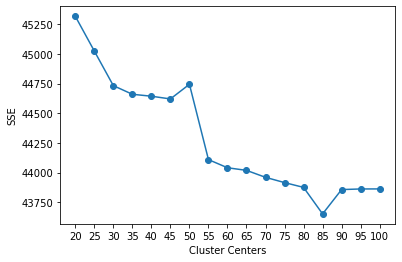

In [64]:
#//*** Run across a range of clusters from 20 - 100 skipping by 5's.
#//*** Should yield a broad overview
#//*** The elbow starts at 55. 85 seems like a lot
find_optimal_clusters(tfidf_model, 20, 100,5 )

In [65]:
#//*** Build the K-Means Clusters with code I appropriated from somewhere
import collections
 
from sklearn.cluster import KMeans

#//*** Start Timing the process
start_time = time.time()

clusters = 55

print("Building Cluster Model")
km_model = KMeans(n_clusters=clusters)
km_model.fit(tfidf_model)

print(f"Cluster Build time {time.time() - start_time}")
clustering = collections.defaultdict(list)

print("Building Cluster Collection")
for idx, label in enumerate(km_model.labels_):
    clustering[label].append(idx)
    
print(f"Cluster collection Build Time: {time.time() - start_time}")


Building Cluster Model
Cluster Build time 891.4329795837402
Building Cluster Collection
Cluster collection Build Time: 891.4519290924072


In [66]:
#//*** Create a df column indicating cluster assignment

#//*** init a list of -1 with a length of df
cluster_list = np.empty(len(df), dtype=np.int)
cluster_list.fill(-1)

print(cluster_list)

for cluster, index_list in clustering.items():
    
    #//*** Assign the cluster value to each index in index_list
    for index in index_list:
        cluster_list[index] = cluster

df['clusters'] = cluster_list

print((cluster_list))
print(df['clusters'])


[-1 -1 -1 ... -1 -1 -1]
[14  8 33 ... 30 20 34]
0        14
1         8
2        33
3        33
4        18
         ..
53287    46
53288    49
53289    30
53290    20
53291    34
Name: clusters, Length: 49869, dtype: int32


In [67]:
#//*******************************************************************************************************
#//*** Rereun tfidf on non-lemmatized & stemmed words to get a better feel for the cluster keywords
#//*******************************************************************************************************
#//*** Build tfid Features
from sklearn.feature_extraction.text import TfidfVectorizer

df['processed'] = mr_clean_text(df['content'],{"lower": True, "newline": True, "html": True, "remove_empty" : False, "punctuation" : True})

#//Remove Items with an Arbitrary length of 0

print(f"Articles of length with 0 characters: {len(df[ df['processed'].str.len() == 0 ])}")
print("Remove these articles")
print(f"Article Count Before: {len(df)}")
df = df[ df['processed'].str.len() > 0 ]
print(f"Article Count After: {len(df)}")

#//************************
#//*** Tokenize the Text
#//************************
#//*** The custom function displays progress while it's working
df['tokens'] = tokenize_series(df['processed'],20,{"fast":True})

#//************************
#//*** Remove Stop Words
#//************************
#//*** The custom function displays progress while it's working
df['tokens'] = remove_stop_words(df['tokens'])

#//*** Convert tokens back to string
df['processed'] = df['tokens'].apply(lambda word_list: " ".join(word_list))

#//*** Start Timing the process
start_time = time.time()

#//*** Initialize the Vectorizer
tfidf = TfidfVectorizer()

#//*** Build the feature matrix, which is a weighted sparse matrix
#df['tfidf'] = tfidf.fit_transform(df['processed'])
tfidf_model = tfidf.fit_transform( df['tokens'].apply(lambda word_list: " ".join(word_list) ) )


#//*** Display the Process Time
print(f"Tfid ProcessTime: {time.time() - start_time}s")

#//*** Print the output to check the results.
#print(df['tfidf'])

#print(df['tfidf'].iloc[-1])

lower True
newline True
html True
remove_empty False
punctuation True
Text Cleaning Time: 14.865574359893799
Articles of length with 0 characters: 0
Remove these articles
Article Count Before: 49869
Article Count After: 49869
fast True
Process Tokens with Split()
Processed 0/20: 0:2492 [49869] in 0.52s elapsed: 0.52s est Remain: 9.82s
Processed 1/20: 2493:4985 [49869] in 0.21s elapsed: 0.73s est Remain: 6.53s
Processed 2/20: 4986:7478 [49869] in 0.19s elapsed: 0.91s est Remain: 5.18s
Processed 3/20: 7479:9971 [49869] in 0.21s elapsed: 1.12s est Remain: 4.49s
Processed 4/20: 9972:12464 [49869] in 0.07s elapsed: 1.2s est Remain: 3.59s
Processed 5/20: 12465:14957 [49869] in 0.07s elapsed: 1.27s est Remain: 2.96s
Processed 6/20: 14958:17450 [49869] in 0.11s elapsed: 1.38s est Remain: 2.56s
Processed 7/20: 17451:19943 [49869] in 0.08s elapsed: 1.47s est Remain: 2.2s
Processed 8/20: 19944:22436 [49869] in 0.08s elapsed: 1.55s est Remain: 1.89s
Processed 9/20: 22437:24929 [49869] in 0.12s ela

In [68]:
#df['tokens'] = remove_stop_words(df['tokens'])

tfidf_model = tfidf.fit_transform( df['tokens'].apply(lambda word_list: " ".join(word_list) ) )

print(df['tokens'].iloc[0])
#print(df)

['washington', 'congressional', 'republicans', 'new', 'fear', 'comes', 'health', 'care', 'lawsuit', 'obama', 'administration', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit', 'challenges', 'administrations', 'authority', 'spend', 'billions', 'dollars', 'health', 'insurance', 'subsidies', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'issues', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode', 'leaving', 'millions', 'people', 'without', 'access', 'health', 'insurance', 'republicans', 'prepared', 'replacement', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'republicans', 'gain', 'full', 'control', 'government', 'stave', 'outcome', 'republicans', 'could', 'find', 'awkward', 'position', 'appropriating', 'huge', 'sums', 'temporarily', 'prop', 'obama', 'health', 'care', 'law', 'angering', 'conserv

In [69]:
#//*** Build the feature names. The index of feature names is referenced in the csr sparse matrix which is the tfidf format
feature_names = tfidf.get_feature_names()

#//*** Takes a tfidf sparse matrix and retuns the top values (default 5)
def build_keywords(input_tfidf,top_count = 5):
    
    #//*** Create a dictionary, using the data as key and indices as value
    #//*** zip() combines two lists into tuple pairs.
    #//*** dict() automatically converts tuple pairs into a key/value dictionary
    temp_dict = dict(zip(input_tfidf.data,input_tfidf.indices))

    #//*** Sort the keys in descending order and return the top values
    top_keys = sorted(temp_dict.keys(),reverse=True)[:top_count]

    #//*** Return a list using a generator, where the temp_dict[key]/value is the index of the feature.
    #//*** Which returns the keywords
    return [ feature_names[temp_dict[key]] for key in top_keys ]

#//*** Start Timing the process
start_time = time.time()
print("Begin Keyword Building...")

#//*** Loop through the tfidf_model, processing each line with build_keywords()
#//*** Use a generator to dump the whole thing into a list
#//*** Which is added as a series to the df
df['keywords'] =  [ build_keywords(csr) for csr in tfidf_model ] 

print(f"Keyword Processing Time: {time.time() - start_time}")



Begin Keyword Building...
Keyword Processing Time: 6.626367568969727


In [70]:
print(df['keywords'])

0             [the, republicans, house, subsidies, health]
1             [precinct, 40th, the, fernandez, detectives]
2                           [wong, tyrus, mr, disney, yeo]
3                              [the, death, died, his, he]
4        [korea, ballistic, missile, north, intercontin...
                               ...                        
53287            [tillerson, climate, carbon, change, the]
53288                 [intelligence, fbi, mi6, the, memos]
53289                  [the, trump, trumps, his, contents]
53290              [colleges, schools, students, the, aid]
53291        [sagittarius, milky, stars, galaxy, galaxies]
Name: keywords, Length: 49869, dtype: object


In [71]:
#//*** For each cluster print the top 5 keywords by frequency. 
#//*** Cluster 34 is the only cluster that has the word climate in the top 5 keywords.
#//*** Assume Cluster 34 is our Climate change cluster. 
#//*** Cluster 34 is the Classifier.

#//*** Return a dictionary object of words frequencies across a series
def df_word_freq(input_series,top_values=-1):
    temp_dict = {}
    
    
    for word_list in input_series:
        
        for word in word_list:
            
            if word in temp_dict.keys():
                temp_dict[word] += 1
            else:
                temp_dict[word] = 1
        
    
    
    
    
    if top_values == -1:
        top_values = len(input_series)+1

    sorted_dict = {k: v for k, v in sorted(list(temp_dict.items()), key=lambda item: item[1],reverse=True)}
    
    #//*** Generate output dictionary based on top 
    out_dict = {}
    for key in list(sorted_dict.keys())[:top_values]:
        out_dict[key] = sorted_dict[key]
    return out_dict
    
cluster_dict = {}
climate_dict = {}

for group in df[ ['clusters', 'keywords'] ].groupby("clusters"):
    
    cluster_dict[group[0]] = df_word_freq(group[1]['keywords'],10)
    climate_dict[group[0]] = df_word_freq(group[1]['keywords'])
    

for key,value in cluster_dict.items():
    print(key,value)


0 {'apple': 197, 'iphone': 63, 'apples': 49, 'the': 30, 'cook': 21, 'ios': 11, 'wireless': 11, 'app': 10, 'revenue': 10, 'apps': 8}
1 {'immigration': 222, 'border': 178, 'the': 175, 'illegal': 139, 'immigrants': 112, 'texas': 98, 'ice': 96, 'aliens': 79, 'agents': 77, 'patrol': 76}
2 {'women': 261, 'the': 161, 'cosby': 59, 'womens': 48, 'woman': 47, 'men': 42, 'sexual': 38, 'gender': 35, 'transgender': 33, 'sex': 32}
3 {'yahoo': 73, 'yahoos': 28, 'mayer': 23, 'verizon': 16, 'marissa': 8, 'the': 7, 'aol': 7, 'company': 7, 'board': 5, 'breach': 5}
4 {'cartel': 160, 'texas': 58, 'the': 53, 'mexican': 51, 'tamaulipas': 46, 'gunmen': 46, 'zetas': 37, 'coahuila': 32, 'nuevo': 23, 'drug': 18}
5 {'breitbart': 176, 'news': 135, 'live': 104, 'siriusxm': 74, 'discuss': 70, 'show': 53, 'the': 50, 'xm': 44, 'caddell': 42, 'sirius': 41}
6 {'clinton': 177, 'emails': 115, 'the': 92, 'fbi': 88, 'email': 83, 'classified': 71, 'server': 62, 'clintons': 52, 'comey': 42, 'department': 33}
7 {'abortion': 14

In [72]:
#//*** Check our assumption by gathering the word frequencies for 'Climate' and 'Change', 'climate', and 'change' 
#//*** across all the cluster.

t_climate = []
t_change = []
t_climate_change = []

#//*** Look at the incidence of 
for key,value in climate_dict.items():
    out = f"{key}: "
    
    
    if 'climate' in value.keys():
        out += f"climate : {value['climate']} "
        t_climate.append(value['climate'])
    else:
        t_climate.append(0)

    if 'change' in value.keys():
        out += f"change : {value['change']}"
        t_change.append(value['change'])
    else:
        t_change.append(0)
    
    if 'climate' in value.keys() and 'change' in value.keys():
        t_climate_change.append( value['climate'] + value['change'])
    else:
        t_climate_change.append(0)

print(out)
    
t_climate = pd.Series(t_climate)
t_change = pd.Series(t_change)
t_climate_change = pd.Series(t_climate_change)



54: 


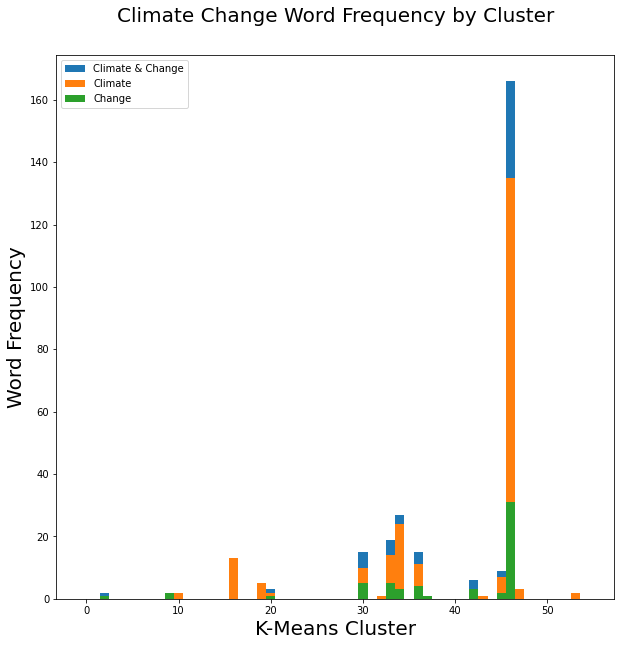

In [73]:
#//*** Plot the climate change word frequencies.
#//*** Cluster 46 stands out. 

#//*** Font value to apply across the plot
bar_font_size = 20

#//*** Somewhat arbitrary value of the display Bar width
bar_width = 1

#//*** Define Subplots
fig, ax = plt.subplots(figsize=(10, 10))

#//*** Draw the Actual Values
#//*** X = Index which is a range 1 - 5
#//*** Y = Actual Case Values per 100k
#//*** Bar Width (How Wide to draw)
#//*** Color = List based color palette
#//*** Note: No Labels, we don't want the ethnicity to be drawn in the legend
plt.bar(t_climate_change.index,t_climate_change.values, bar_width, label='Climate & Change')
plt.bar(t_climate.index,t_climate.values, bar_width, label='Climate')
plt.bar(t_change.index,t_change.values, bar_width, label='Change')

plt.title("Climate Change Word Frequency by Cluster",fontsize=bar_font_size,y=1.05)

#//*** Label the Y axis
plt.xlabel("K-Means Cluster", fontsize=bar_font_size)
plt.ylabel("Word Frequency", fontsize=bar_font_size)

#//*** Draw the Legend
plt.legend(fontsize=bar_font_size*.5)

#//*** Display the Graph
plt.show()

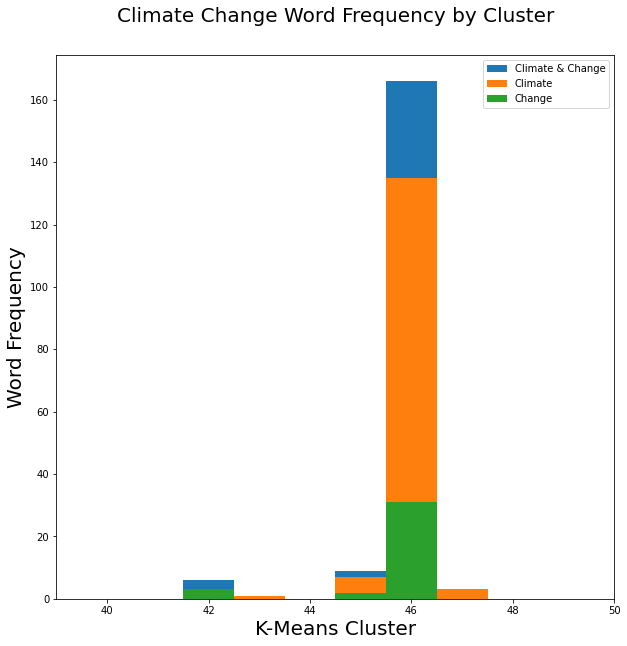

In [83]:
#//*** Define Subplots
fig, ax = plt.subplots(figsize=(10, 10))
low_dex = 40
hi_dex = 50
#//*** Draw the Actual Values
#//*** X = Index which is a range 1 - 5
#//*** Y = Actual Case Values per 100k
#//*** Bar Width (How Wide to draw)
#//*** Color = List based color palette
#//*** Note: No Labels, we don't want the ethnicity to be drawn in the legend
plt.bar(t_climate_change.index[low_dex:hi_dex],t_climate_change.values[low_dex:hi_dex], bar_width, label='Climate & Change')
plt.bar(t_climate.index[low_dex:hi_dex],t_climate.values[low_dex:hi_dex], bar_width, label='Climate')
plt.bar(t_change.index[low_dex:hi_dex],t_change.values[low_dex:hi_dex], bar_width, label='Change')

plt.title("Climate Change Word Frequency by Cluster",fontsize=bar_font_size,y=1.05)

#//*** Label the Y axis
plt.xlabel("K-Means Cluster", fontsize=bar_font_size)
plt.ylabel("Word Frequency", fontsize=bar_font_size)

#//*** Draw the Legend
plt.legend(fontsize=bar_font_size*.5)

#//*** Display the Graph
plt.show()

In [86]:
#//*** The 

tgt_cluster = 46
print(df[df['clusters']== tgt_cluster]['title'].sample(50))

42290                    Giuliani stands by Obama comments
18526    Turkey Suspends Human Rights Convention As Eur...
48136    Meet the all-star team of lawyers Robert Muell...
30976    Report: ’Hundreds’ of Dead Voters Found Voting...
10783    Senate Confirms Trump Air Force Secretary Pick...
9493     Fitton: Obama IRS Scandal Continues – Judicial...
10796    Flashback: Obama Stranded Legal Cuban Traveler...
6827     U.S. Presidential Race, Apple, Gene Wilder: Yo...
43038    Arkansas governor signs amended ’religious fre...
37392                  Will Erdogan’s countercoup succeed?
15840    Sharyl Attkisson: Obama and Clinton Lied to th...
6671     Turkish Leader Erdogan Making New Enemies and ...
42428    Election 2016: Jeb Bush makes his first Iowa f...
2894     Hillary Clinton, Donald Trump, Narendra Modi: ...
6337     Trump Meets With Al Gore on Climate Change Whi...
45019    U.N. World Refugee Day: Richer nations urged t...
39870    Nicaraguan President wins fourth term, with wi.

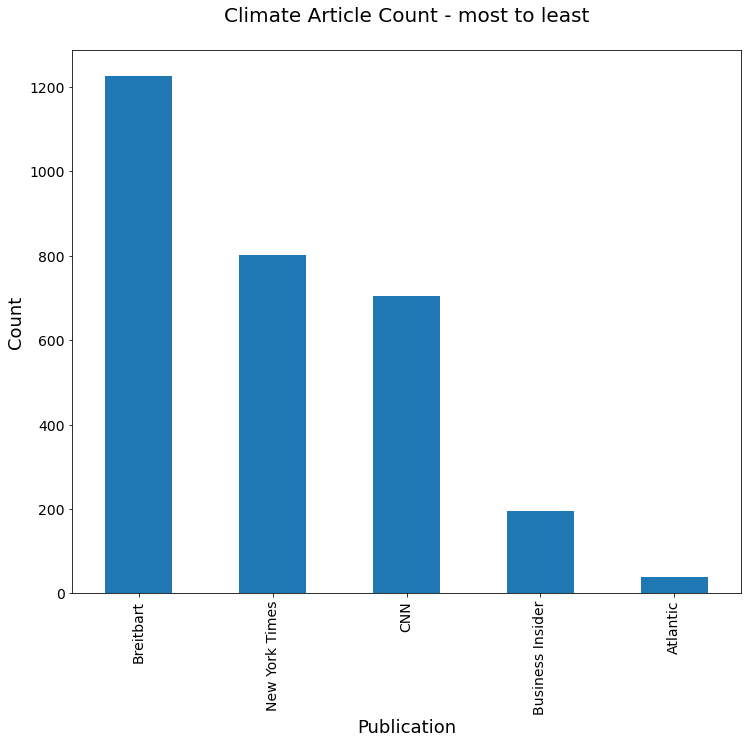

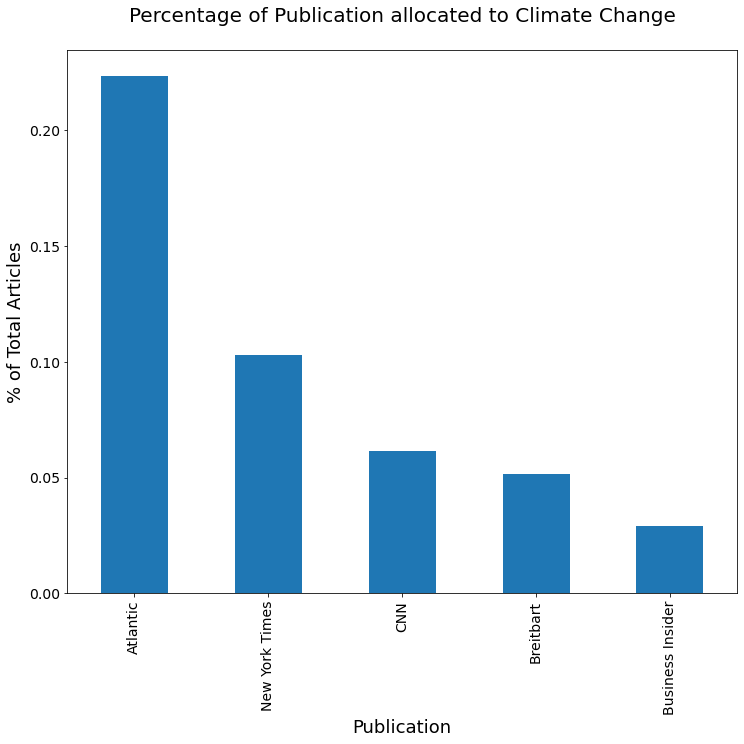

In [87]:
#The word Climate appears as the most frequent word in cluster 44
#//*** Cluster 44 is most likely stories about climate change.
climate_df = df[df['clusters'] == tgt_cluster]

#display bar chart of articles sorted by counts
ax = climate_df['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Climate Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

#display bar chart of articles sorted by counts
ax = (climate_df['publication'].value_counts() / df['publication'].value_counts() ).sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Percentage of Publication allocated to Climate Change\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('% of Total Articles', fontsize=18);
plt.show()

In [88]:
#//*** Backup our work to a file.
df.to_pickle("z_wk05_assignment.zip")
#//*** Read back from a file
#df = pd.read_pickle("z_wk05_assignment.zip")

In [89]:
#//**********************************
#//*** Apply Part of Speech Tagging
#//*******************************************************************************************
#//*** I was under the incorrect assumption that POS Tagg was required for lemmatization
#//*** It's not. But it's a whole gaggle of CPU cycles that may find a use later
#//*******************************************************************************************
#df['pos_tag'] = apply_pos_tag(df['tokens'])

In [90]:
#10.1 - Thresholding Numerical Feature Variance

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

#import data
iris= datasets.load_iris()

#create features and target
features=iris.data
target=iris.target

#create thresholder
thresholder = VarianceThreshold(threshold=.5)

#create high variance feature matrix and print
features_high_variance=thresholder.fit_transform(features)
print(features_high_variance[0:3])

#10.2 - Thresholding Binary Feature Variance

features = [[0,1,0],
            [0,1,1],
            [0,1,0],
            [0,1,1],
            [1,0,0]]

thresholder=VarianceThreshold(threshold = (.75*(1-.75)))
print(thresholder.fit_transform(features))

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]
[[0]
 [1]
 [0]
 [1]
 [0]]


In [91]:
# //*** CODE HERE

In [92]:
# //*** CODE HERE

In [93]:
"""
from sklearn.feature_extraction.text import CountVectorizer

#//*** Start Timing the process
start_time = time.time()

#//*** Create the bag of words feature matrix
#//*** Initialize a new instance of the Counter Vectorizer
count_vector = CountVectorizer()

#//*** Vectorize the word count into a bag of words column
#//*** This is awesome in the sense that so much work is abstracted behind a single line of code.
#//*** I don't quite understand what is going on here. I'm assuming we will build upon this work and clarity
#//*** (or confounding) will come later.
print("Begin Build Count Vectorizer")
cv = count_vector.fit_transform(df['processed'])

#//*** Display the Process Time
print(f"Count Vectorizer Process Time: {time.time() - start_time}")
"""

'\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n#//*** Start Timing the process\nstart_time = time.time()\n\n#//*** Create the bag of words feature matrix\n#//*** Initialize a new instance of the Counter Vectorizer\ncount_vector = CountVectorizer()\n\n#//*** Vectorize the word count into a bag of words column\n#//*** This is awesome in the sense that so much work is abstracted behind a single line of code.\n#//*** I don\'t quite understand what is going on here. I\'m assuming we will build upon this work and clarity\n#//*** (or confounding) will come later.\nprint("Begin Build Count Vectorizer")\ncv = count_vector.fit_transform(df[\'processed\'])\n\n#//*** Display the Process Time\nprint(f"Count Vectorizer Process Time: {time.time() - start_time}")\n'